In [1]:
# We import the libraries that we will need for the lab.
import pandas as pd # Data handling and dataframes
pd.options.display.max_columns = None # Unlimited number of columns will be displayed.

import requests   # The Requests library allows you to send HTTP requests and interact with web APIs or websites
import matplotlib.pyplot as plt # Matplotlib is a powerful plotting library that provides a variety of functions and methods for creating visualizations

In [2]:
## Link info: https://ygoprodeck.com/api-guide/

In [3]:
# Function to make the API call.
def get_api(url):
    res = requests.get(url) 
    if res.status_code == 200:  
        return res.json() 
    else:  
        return f"Error {res.status_code}"

url = "https://db.ygoprodeck.com/api/v7/cardinfo.php"
res_api = get_api(url)


In [4]:
# We review the information and can see that there is only one list of dictionaries with the key 'data'.
res_api.keys()

dict_keys(['data'])

In [5]:
# Inside it, all the information of the cards is present. So we save this list of dictionaries into a variable.
dict_clean= res_api["data"]


In [6]:
# We check the keys that are inside.
res_api["data"][0].keys()
res_api['data'][1000].keys() # We test it to see all the different keys that exist, since the information states that not all of them have the same ones.

dict_keys(['id', 'name', 'type', 'frameType', 'desc', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 'card_images', 'card_prices'])

In [7]:
# We discard the information that is not relevant to us, such as 'card_sets' and 'card_images'. 
# And we create an empty dictionary with the keys that we do want.
info = {
    "id_": [],
    "name": [],
    "type": [],
    "frametype": [],
    "desc": [],
    "race": [],
    "archetype": [],
    "atk": [],
    "def": [],
    "level": [],
    "attribute": [],
    "url_": [],
    "cardmarket_price": [],
    "tcgplayer_price": [],
    "ebay_price": [],
    "amazon_price": [],
    "coolstuffinc_price": []
          }

In [8]:
# Iteramos por todos los valores que tenemos en la key "data" guardado previamente en la variable diccionario_limpio.
# we use the 'get' method to avoid errors, meaning if a key is not present in all elements of the dictionary,
# by using this method, you can introduce `None` as a placeholder if a key is not present in a dictionary.
for i in dict_clean:
    info["id_"].append(i.get("id", None))
    info["name"].append(i.get("name", None))
    info["type"].append(i.get("type", None))
    info["frametype"].append(i.get("frameType", None))
    info["desc"].append(i.get("desc", None))
    info["race"].append(i.get("race", None))
    info["archetype"].append(i.get("archetype", None))
    info["atk"].append(i.get("atk", None))
    info["def"].append(i.get("def", None))
    info["level"].append(i.get("level", None))
    info["attribute"].append(i.get("attribute", None))


In [9]:
# Iterate through the elements of the "data" list.
for data_element in dict_clean:
    # Access the "card_prices" list.
    card_prices_list = data_element['card_prices']
    
    # Iterate through the elements of the "card_prices" list.
    for card_price_element in card_prices_list:
        # Access each specific price and add it to the corresponding list in "info".
        info["cardmarket_price"].append(card_price_element['cardmarket_price'])
        info["tcgplayer_price"].append(card_price_element['tcgplayer_price'])
        info["ebay_price"].append(card_price_element['ebay_price'])
        info["amazon_price"].append(card_price_element['amazon_price'])
        info["coolstuffinc_price"].append(card_price_element['coolstuffinc_price'])


In [10]:
# We want to be able to see more detailed information and the image of the card. We search for a website where, by changing the name, it will give us the URL of each card.

# We create an empty dictionary where we will store all the URLs that we modify.
name_search = {"name_search": []}

#We iterate to replace spaces with underscores and add them to the empty dictionary
for e in info["name"]:
    n = e.replace(" ", "_")  # Reemplazar espacios por barra baja en cada nombre
    name_search["name_search"].append(n)  # Agregar el nombre modificado a la lista

# We create a loop to add the URLs to the "info" dictionary so that they can be displayed in the dataframe.
for i in name_search["name_search"]:
    url_search = f"https://yugioh.fandom.com/wiki/{i}" # We make each URL unique with "name_search".
    info["url_"].append(url_search) # We add each URL to "info['url_']".


In [11]:
# To conclude, we create a DataFrame with the dictionary "info" that contains all the information we have previously cleaned.
df_allcards = pd.DataFrame(info)

In [12]:
# We are going to clean the "desc" column because it contains "\n" and "\r" characters. We will replace both with a space.
df_allcards["desc"] = df_allcards["desc"].str.replace("\n", " ").str.replace("\r", " ")


In [13]:
# we set the "id_" column as the index.
df_allcards.set_index('id_', inplace=True)


In [14]:
df_allcards

,name,type,frametype,desc,race,archetype,atk,def,level,attribute,url_,cardmarket_price,tcgplayer_price,ebay_price,amazon_price,coolstuffinc_price
id_,,,,,,,,,,,,,,,,
34541863,"""A"" Cell Breeding Device",Spell Card,spell,"During each of your Standby Phases, put 1 A-Co...",Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Breedi...",4.15,0.18,0.99,24.45,0.25
64163367,"""A"" Cell Incubator",Spell Card,spell,Each time an A-Counter(s) is removed from play...,Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Incubator",0.15,0.21,1.25,0.50,0.25
91231901,"""A"" Cell Recombination Device",Spell Card,spell,Target 1 face-up monster on the field; send 1 ...,Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Recomb...",0.13,0.19,0.99,0.50,0.49
73262676,"""A"" Cell Scatter Burst",Spell Card,spell,"Select 1 face-up ""Alien"" monster you control. ...",Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Scatte...",0.02,0.13,2.00,9.76,0.25
98319530,"""Infernoble Arms - Almace""",Spell Card,spell,While this card is equipped to a monster: You ...,Equip,Noble Knight,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""Infernoble_Arm...",0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648201,ZW - Sleipnir Mail,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Beast,Utopia,1000.0,1000.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sleipnir_Mail,0.12,0.22,0.99,0.49,0.99
95886782,ZW - Sylphid Wing,Effect Monster,effect,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Beast,Utopia,800.0,1600.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sylphid_Wing,0.05,0.06,1.50,0.30,0.39
81471108,ZW - Tornado Bringer,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Dragon,Utopia,1300.0,1800.0,5.0,WIND,https://yugioh.fandom.com/wiki/ZW_-_Tornado_Br...,0.11,0.06,0.99,1.23,0.49


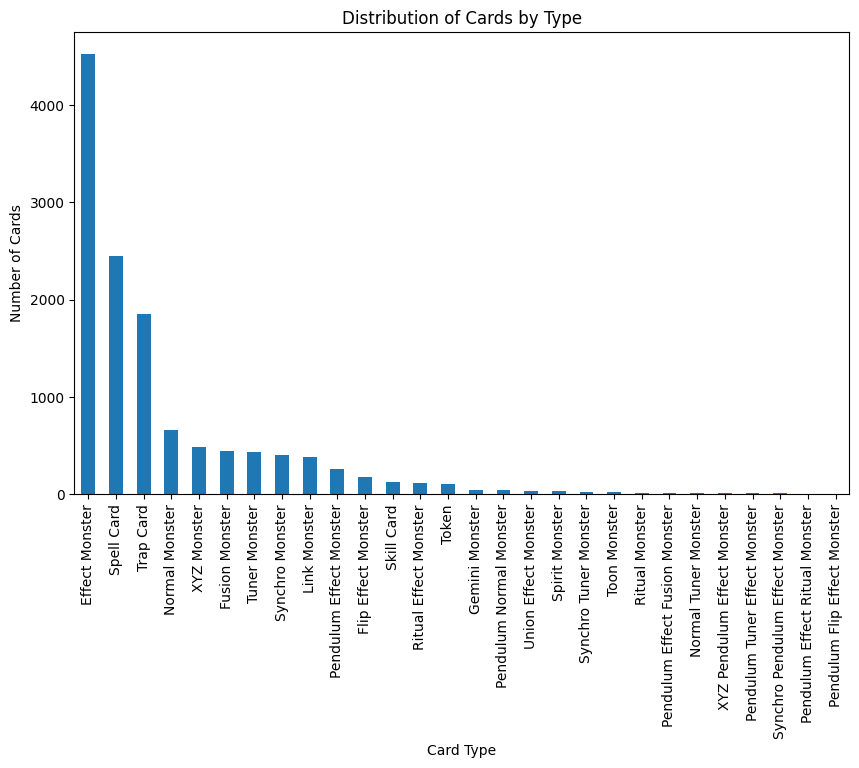

In [15]:
# We visualize the distribution of cards by type using bar charts.
type_counts = df_allcards['type'].value_counts()

type_counts.plot(kind='bar', figsize=(10, 6), title='Distribution of Cards by Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Cards')
plt.show()

# Pandas

In [16]:
# Get the dimensions
df_allcards.shape

(12666, 16)

In [17]:
# Show the first 6 rows
df_allcards.head(6)

,name,type,frametype,desc,race,archetype,atk,def,level,attribute,url_,cardmarket_price,tcgplayer_price,ebay_price,amazon_price,coolstuffinc_price
id_,,,,,,,,,,,,,,,,
34541863,"""A"" Cell Breeding Device",Spell Card,spell,"During each of your Standby Phases, put 1 A-Co...",Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Breedi...",4.15,0.18,0.99,24.45,0.25
64163367,"""A"" Cell Incubator",Spell Card,spell,Each time an A-Counter(s) is removed from play...,Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Incubator",0.15,0.21,1.25,0.50,0.25
91231901,"""A"" Cell Recombination Device",Spell Card,spell,Target 1 face-up monster on the field; send 1 ...,Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Recomb...",0.13,0.19,0.99,0.50,0.49
73262676,"""A"" Cell Scatter Burst",Spell Card,spell,"Select 1 face-up ""Alien"" monster you control. ...",Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Scatte...",0.02,0.13,2.00,9.76,0.25
98319530,"""Infernoble Arms - Almace""",Spell Card,spell,While this card is equipped to a monster: You ...,Equip,Noble Knight,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""Infernoble_Arm...",0.00,0.00,0.00,0.00,0.00
37478723,"""Infernoble Arms - Durendal""",Spell Card,spell,While this card is equipped to a monster: You ...,Equip,Noble Knight,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""Infernoble_Arm...",0.12,0.09,0.99,2.96,0.00


In [18]:
# Show the last 7 rows
df_allcards.tail(7)

,name,type,frametype,desc,race,archetype,atk,def,level,attribute,url_,cardmarket_price,tcgplayer_price,ebay_price,amazon_price,coolstuffinc_price
id_,,,,,,,,,,,,,,,,
32164201,ZW - Pegasus Twin Saber,Effect Monster,effect,"You can only control 1 ""ZW - Pegasus Twin Sabe...",Beast,ZEXAL,1000.0,2100.0,5.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Pegasus_Tw...,0.06,0.07,0.99,0.59,0.49
87008374,ZW - Phoenix Bow,Effect Monster,effect,"You can target 1 face-up ""Number C39: Utopia R...",Winged Beast,Utopia,1100.0,0.0,3.0,FIRE,https://yugioh.fandom.com/wiki/ZW_-_Phoenix_Bow,0.24,0.21,0.99,0.98,0.39
2648201,ZW - Sleipnir Mail,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Beast,Utopia,1000.0,1000.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sleipnir_Mail,0.12,0.22,0.99,0.49,0.99
95886782,ZW - Sylphid Wing,Effect Monster,effect,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Beast,Utopia,800.0,1600.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sylphid_Wing,0.05,0.06,1.50,0.30,0.39
81471108,ZW - Tornado Bringer,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Dragon,Utopia,1300.0,1800.0,5.0,WIND,https://yugioh.fandom.com/wiki/ZW_-_Tornado_Br...,0.11,0.06,0.99,1.23,0.49
18865703,ZW - Ultimate Shield,Effect Monster,effect,When this card is Normal or Special Summoned: ...,Aqua,Utopia,0.0,2000.0,4.0,EARTH,https://yugioh.fandom.com/wiki/ZW_-_Ultimate_S...,0.07,0.05,0.99,0.20,0.49
76080032,ZW - Unicorn Spear,Effect Monster,effect,"You can target 1 ""Number C39: Utopia Ray"" you ...",Beast,Utopia,1900.0,0.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Unicorn_Spear,0.10,0.21,0.99,0.25,0.39


In [19]:
# Show column information
df_allcards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 34541863 to 76080032
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                12666 non-null  object 
 1   type                12666 non-null  object 
 2   frametype           12666 non-null  object 
 3   desc                12666 non-null  object 
 4   race                12666 non-null  object 
 5   archetype           7302 non-null   object 
 6   atk                 8240 non-null   float64
 7   def                 7859 non-null   float64
 8   level               7859 non-null   float64
 9   attribute           8240 non-null   object 
 10  url_                12666 non-null  object 
 11  cardmarket_price    12666 non-null  object 
 12  tcgplayer_price     12666 non-null  object 
 13  ebay_price          12666 non-null  object 
 14  amazon_price        12666 non-null  object 
 15  coolstuffinc_price  12666 non-null  object 
dtyp

In [20]:
# Is used to generate a statistical summary of a DataFrame
df_allcards.describe().T

,count,mean,std,min,25%,50%,75%,max
atk,8240.0,1477.093447,944.583018,0.0,800.0,1500.0,2200.0,5000.0
def,7859.0,1248.499809,864.953977,0.0,500.0,1200.0,1900.0,5000.0
level,7859.0,4.569920,2.392625,0.0,3.0,4.0,6.0,13.0


In [21]:
# Find a row by index
df_allcards.loc[38033121]


name                                                 Dark Magician Girl
type                                                     Effect Monster
frametype                                                        effect
desc                  Gains 300 ATK for every "Dark Magician" or "Ma...
race                                                        Spellcaster
archetype                                                 Dark Magician
atk                                                              2000.0
def                                                              1700.0
level                                                               6.0
attribute                                                          DARK
url_                  https://yugioh.fandom.com/wiki/Dark_Magician_Girl
cardmarket_price                                                   0.19
tcgplayer_price                                                    0.44
ebay_price                                                      

In [22]:
# Convert the column to float type.
df_allcards['cardmarket_price'] = df_allcards['cardmarket_price'].astype(float)
df_allcards['tcgplayer_price'] = df_allcards['tcgplayer_price'].astype(float)
df_allcards['ebay_price'] = df_allcards['ebay_price'].astype(float)
df_allcards['amazon_price'] = df_allcards['amazon_price'].astype(float)
df_allcards['coolstuffinc_price'] = df_allcards['coolstuffinc_price'].astype(float)



In [23]:
df_allcards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 34541863 to 76080032
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                12666 non-null  object 
 1   type                12666 non-null  object 
 2   frametype           12666 non-null  object 
 3   desc                12666 non-null  object 
 4   race                12666 non-null  object 
 5   archetype           7302 non-null   object 
 6   atk                 8240 non-null   float64
 7   def                 7859 non-null   float64
 8   level               7859 non-null   float64
 9   attribute           8240 non-null   object 
 10  url_                12666 non-null  object 
 11  cardmarket_price    12666 non-null  float64
 12  tcgplayer_price     12666 non-null  float64
 13  ebay_price          12666 non-null  float64
 14  amazon_price        12666 non-null  float64
 15  coolstuffinc_price  12666 non-null  float64
dtyp

In [24]:
# The price of the card from Cardmarket (in €). Let's convert the column from € to $ and round to two decimal places. "1€ is 1.0970$"

df_allcards["cardmarket_price"] = (df_allcards["cardmarket_price"] * 1.0970).round(2)

In [25]:
df_allcards["cardmarket_price"]

id_
34541863    4.55
64163367    0.16
91231901    0.14
73262676    0.02
98319530    0.00
            ... 
2648201     0.13
95886782    0.05
81471108    0.12
18865703    0.08
76080032    0.11
Name: cardmarket_price, Length: 12666, dtype: float64

In [26]:
# Let's create a column with the average of the different stores.
df_allcards['mean_price'] = df_allcards[['cardmarket_price','tcgplayer_price','ebay_price','amazon_price','coolstuffinc_price']].mean(axis=1)

In [27]:
df_allcards


,name,type,frametype,desc,race,archetype,atk,def,level,attribute,url_,cardmarket_price,tcgplayer_price,ebay_price,amazon_price,coolstuffinc_price,mean_price
id_,,,,,,,,,,,,,,,,,
34541863,"""A"" Cell Breeding Device",Spell Card,spell,"During each of your Standby Phases, put 1 A-Co...",Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Breedi...",4.55,0.18,0.99,24.45,0.25,6.084
64163367,"""A"" Cell Incubator",Spell Card,spell,Each time an A-Counter(s) is removed from play...,Continuous,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Incubator",0.16,0.21,1.25,0.50,0.25,0.474
91231901,"""A"" Cell Recombination Device",Spell Card,spell,Target 1 face-up monster on the field; send 1 ...,Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Recomb...",0.14,0.19,0.99,0.50,0.49,0.462
73262676,"""A"" Cell Scatter Burst",Spell Card,spell,"Select 1 face-up ""Alien"" monster you control. ...",Quick-Play,Alien,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""A""_Cell_Scatte...",0.02,0.13,2.00,9.76,0.25,2.432
98319530,"""Infernoble Arms - Almace""",Spell Card,spell,While this card is equipped to a monster: You ...,Equip,Noble Knight,NaN,NaN,NaN,None,"https://yugioh.fandom.com/wiki/""Infernoble_Arm...",0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648201,ZW - Sleipnir Mail,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Beast,Utopia,1000.0,1000.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sleipnir_Mail,0.13,0.22,0.99,0.49,0.99,0.564
95886782,ZW - Sylphid Wing,Effect Monster,effect,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Beast,Utopia,800.0,1600.0,4.0,LIGHT,https://yugioh.fandom.com/wiki/ZW_-_Sylphid_Wing,0.05,0.06,1.50,0.30,0.39,0.460
81471108,ZW - Tornado Bringer,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",Dragon,Utopia,1300.0,1800.0,5.0,WIND,https://yugioh.fandom.com/wiki/ZW_-_Tornado_Br...,0.12,0.06,0.99,1.23,0.49,0.578


In [28]:
# Save the DataFrame to a CSV.
df_allcards.to_csv('../data/all_cards.csv', index=True)